In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'

import time
from tqdm.notebook import tqdm

In [2]:
data = pd.read_excel('article.xlsx')

del data['Unnamed: 0']

In [3]:
from konlpy.tag import Twitter
from collections import Counter
from konlpy.tag import Okt

In [4]:
data['날짜'] = pd.to_datetime(data['날짜'])

month = []
for i in range(len(data)):
    month.append(data['날짜'][i].month)

data['기사_월'] = month

In [5]:
okt = Okt()

In [34]:
date02 = []
date03 = []
date04 = []
date05 = []
date06 = []
date07 = []
date08 = []

In [35]:
for i in tqdm(range(len(data))):
    if data.loc[i,'기사_월'] == 2:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date02.append(noun[j])
    elif data.loc[i,'기사_월'] == 3:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date03.append(noun[j])
    elif data.loc[i,'기사_월'] == 4:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date04.append(noun[j])
    elif data.loc[i,'기사_월'] == 5:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date05.append(noun[j])
    elif data.loc[i,'기사_월'] == 6:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date06.append(noun[j])
    elif data.loc[i,'기사_월'] == 7:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date07.append(noun[j])
    elif data.loc[i,'기사_월'] == 8:
        noun = okt.nouns(data["본문"][i])
        for j in range(len(noun)):
            date08.append(noun[j])
    else:
        continue

In [37]:
len(date02)
len(date03)
len(date04)
len(date05)
len(date06)
len(date07)
len(date08)

630917

680491

625244

776267

656508

502185

371197

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [190]:
word = []
for i in tqdm(range(len(data))):
    noun = okt.nouns(data["본문"][i])
    word.append(" ".join(noun))

In [192]:
data['Word'] = word

In [194]:
data.to_csv("article2.csv")

In [26]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
rc('font',family = 'Malgun Gothic')
plt.style.use('ggplot')

In [7]:
data = pd.read_csv("article2.csv")

In [16]:
data.dropna(inplace=True)

In [74]:
month = data[data['기사_월']==7]
tfidf_vectorizer.fit(month['Word'])
len(tfidf_vectorizer.vocabulary_)
list(sorted(tfidf_vectorizer.vocabulary_.items()))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

21984

[('가가', 0),
 ('가감', 1),
 ('가게', 2),
 ('가격', 3),
 ('가격표', 4),
 ('가결', 5),
 ('가계', 6),
 ('가계부채', 7),
 ('가고시마현', 8),
 ('가곡', 9),
 ('가공', 10),
 ('가교', 11),
 ('가구', 12),
 ('가금류', 13),
 ('가기', 14),
 ('가까스로', 15),
 ('가까이', 16),
 ('가끔', 17),
 ('가나', 18),
 ('가나가와현', 19),
 ('가늠', 20),
 ('가늠자', 21),
 ('가능', 22),
 ('가능성', 23),
 ('가닥', 24),
 ('가담', 25),
 ('가도', 26),
 ('가동', 27),
 ('가두', 28),
 ('가드', 29),
 ('가드레일', 30),
 ('가득', 31),
 ('가든', 32),
 ('가든스', 33),
 ('가디언', 34),
 ('가뜩이나', 35),
 ('가라', 36),
 ('가라오케', 37),
 ('가락', 38),
 ('가람', 39),
 ('가랑비', 40),
 ('가래', 41),
 ('가량', 42),
 ('가려진', 43),
 ('가렴주구', 44),
 ('가령', 45),
 ('가로', 46),
 ('가로막', 47),
 ('가로세로', 48),
 ('가로수', 49),
 ('가로수길', 50),
 ('가루', 51),
 ('가르침', 52),
 ('가리개', 53),
 ('가림', 54),
 ('가마', 55),
 ('가망', 56),
 ('가맹', 57),
 ('가맹업', 58),
 ('가면', 59),
 ('가명', 60),
 ('가무', 61),
 ('가문', 62),
 ('가뭄', 63),
 ('가미', 64),
 ('가방', 65),
 ('가변', 66),
 ('가부장', 67),
 ('가부키쵸', 68),
 ('가비', 69),
 ('가사', 70),
 ('가사노동', 71),
 ('가산', 72),
 ('가상', 73),
 ('가상공간

In [75]:
tfidf = tfidf_vectorizer.transform(month['Word']).toarray()
df = pd.DataFrame(tfidf)
df

,0,1,2,3,4,5,6,7,8,9,...,21974,21975,21976,21977,21978,21979,21980,21981,21982,21983
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df.shape

(9034, 21984)

In [77]:
idx = []
for i in range(len(df)):
    p = df.iloc[i,:]
    q = p[p>0.5].reset_index()
    for j in range(len(q)):
        idx.append(q['index'][j])

In [78]:
idx2 = pd.DataFrame({'Value':pd.Series(idx).value_counts().index,'size': pd.Series(idx).value_counts().values})

In [79]:
keys = list(tfidf_vectorizer.vocabulary_.keys())
values = list(tfidf_vectorizer.vocabulary_.values())
df = pd.DataFrame({'Key':keys , 'Value':values})

In [80]:
total = pd.merge(df,idx2,how='left')

In [81]:
total = total.sort_values(by='size',ascending=False)

<BarContainer object of 15 artists>

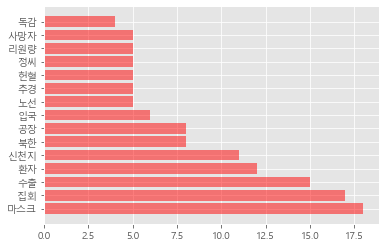

In [37]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

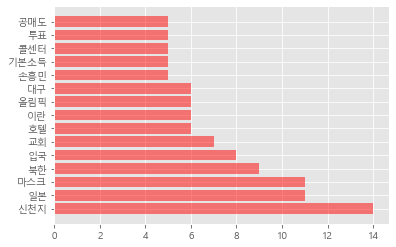

In [46]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

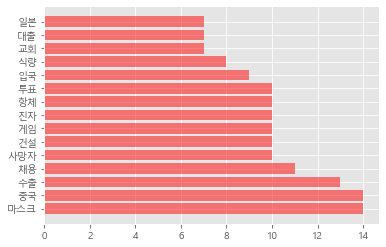

In [55]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

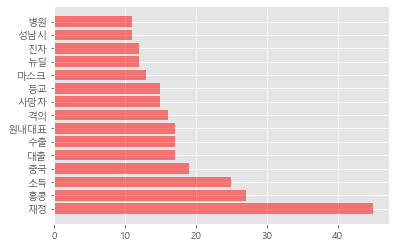

In [64]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

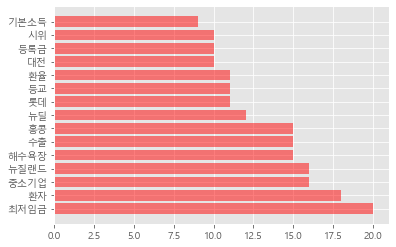

In [73]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

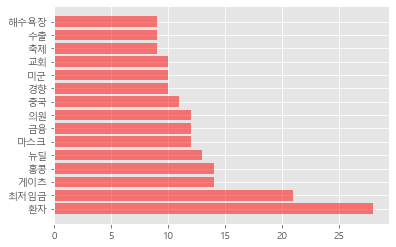

In [82]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)

<BarContainer object of 15 artists>

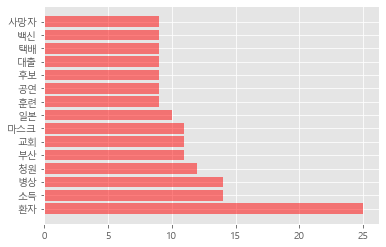

In [27]:
plt.barh(total['Key'].head(15),total['size'].head(15), color='red', alpha=0.5)